# Optical Elements as Ophyd Objects

This section is based on the **TES** beamline example.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

## Run "Beamline" SRW simulations

In this example, we scan the horizontal size of the aperture and collect the resulting averaged intensities and corresponding 2D intensity distributions from the "Watchpoint" report on the "Beamline" page of Sirepo/SRW app.

Start ``ipython`` and run the following where ``sim_id`` is the UID for the simulation we are working with:



Transient Scan ID: 1     Time: 2022-08-26 19:39:49
Persistent Unique Scan ID: '294f84c7-40dd-456a-91c6-a7c8273a1707'


New stream: 'primary'
+-----------+------------+-------------------------+-------------+------------+
|   seq_num |       time | aperture_horizontalSize | w9_duration |    w9_mean |
+-----------+------------+-------------------------+-------------+------------+
|         1 | 19:40:21.2 |                   0.000 |      31.142 |      0.000 |


|         2 | 19:40:46.9 |                   0.500 |      25.551 | 2510544190625.287 |


|         3 | 19:41:12.6 |                   1.000 |      25.557 | 41560782559219.422 |


|         4 | 19:41:38.3 |                   1.500 |      25.569 | 136793792948293.203 |


|         5 | 19:42:04.0 |                   2.000 |      25.565 | 346875726031568.125 |
+-----------+------------+-------------------------+-------------+------------+
generator scan ['294f84c7'] (scan num: 1)


                                 time  \
seq_num                                 
1       2022-08-26 19:40:21.264462947   
2       2022-08-26 19:40:46.965500355   
3       2022-08-26 19:41:12.668508530   
4       2022-08-26 19:41:38.371814966   
5       2022-08-26 19:42:04.087978601   

                                       w9_sirepo_data_json  \
seq_num                                                      
1        {"models": {"arbitraryMagField": {"interpolati...   
2        {"models": {"arbitraryMagField": {"interpolati...   
3        {"models": {"arbitraryMagField": {"interpolati...   
4        {"models": {"arbitraryMagField": {"interpolati...   
5        {"models": {"arbitraryMagField": {"interpolati...   

                                       w9_sirepo_data_hash  w9_duration  \
seq_num                                                                   
1        522b6322a7f75276b743a03640880518a161f586dae7c3...    31.141749   
2        217cfb8a342b3c26d3153124eef1d5aca57e1dbf50e

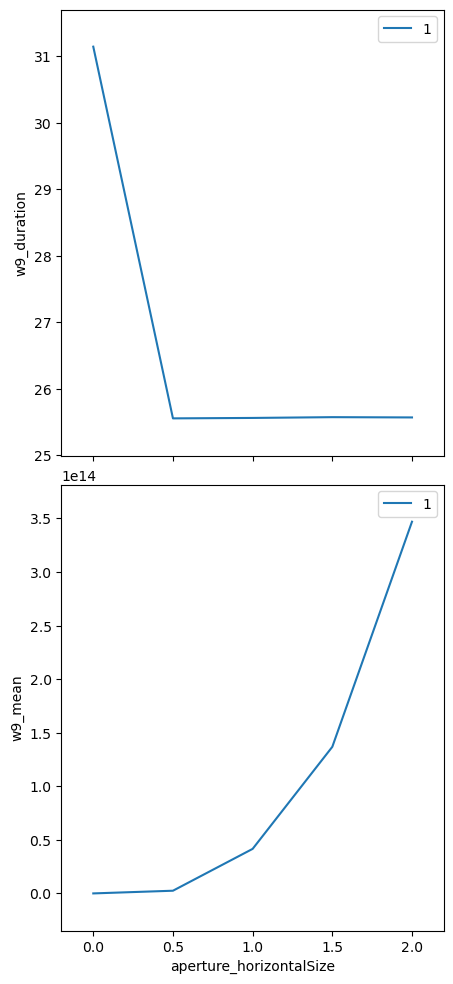

In [1]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("srw", "00000002")
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

aperture.horizontalSize.kind = "hinted"
w9.duration.kind = "hinted"

(uid,) = RE(bp.scan([w9], aperture.horizontalSize, 0, 2, 5))

hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

w9_image = np.array(list(hdr.data("w9_image")))

Data shape: (5, 42, 960)


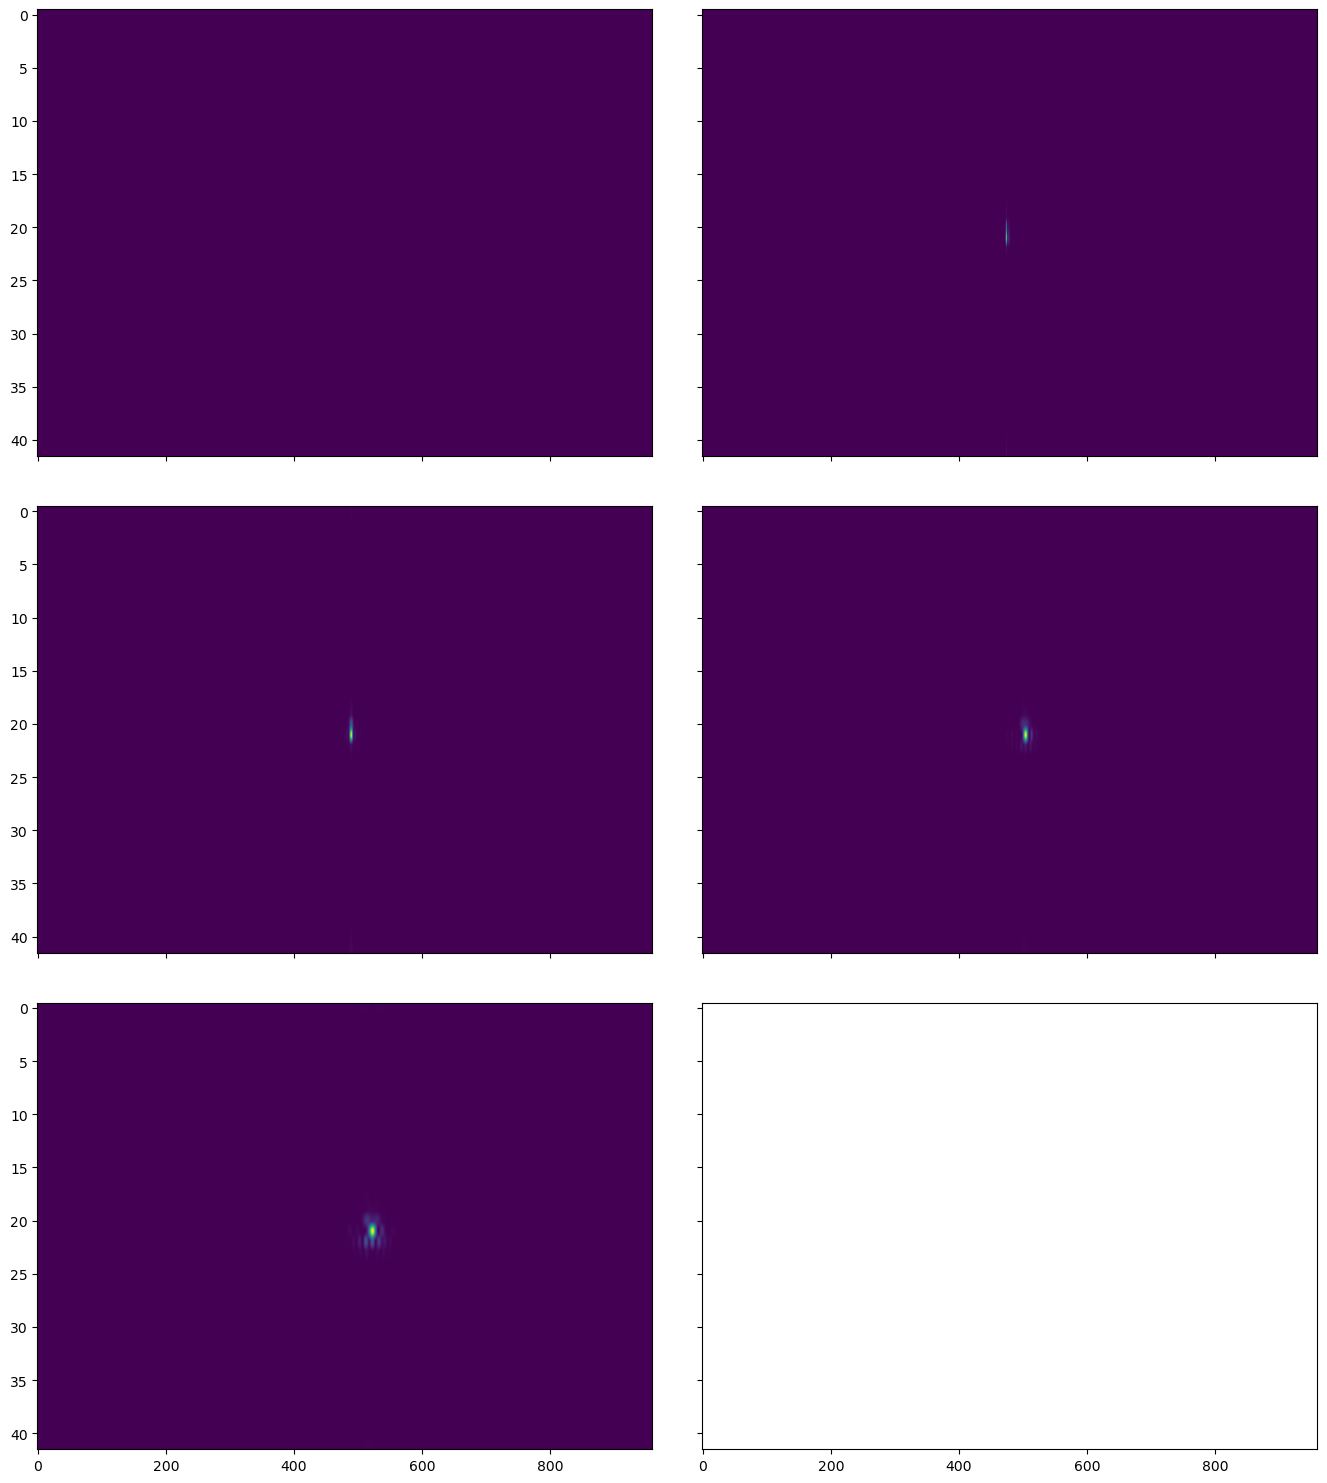

In [2]:
from mpl_toolkits.axes_grid1 import ImageGrid

print(f"Data shape: {w9_image.shape}")
num_frames = w9_image.shape[0]
ncols = 2
nrows = int(np.ceil(num_frames / ncols))

fig = plt.figure()
grid = ImageGrid(fig, (1, 2, ncols, nrows),
                 nrows_ncols=(nrows, ncols),
                 axes_pad=0.5,
                 aspect=False)

for ax, im in zip(grid, w9_image[:, ...]):
    ax.imshow(im, aspect="auto")

## Run "Beam Statistics" Sirepo/Shadow app simulations

In this example, we scan the toroidal mirror's radius and collect the results of the "Beam Statistics" report on the "Beamline" page of Sirepo/Shadow app. At the end of the execution, we provide the timing report for these simulations.



Transient Scan ID: 1     Time: 2022-08-26 19:42:06
Persistent Unique Scan ID: 'baca5cc8-d143-4a0e-abdc-98bc284d5acc'


New stream: 'primary'
+-----------+------------+--------------+--------------+
|   seq_num |       time | toroid_r_maj | bsr_duration |
+-----------+------------+--------------+--------------+
|         1 | 19:42:12.3 |    10000.000 |        6.179 |


|         2 | 19:42:16.5 |    12000.000 |        4.137 |


|         3 | 19:42:20.7 |    14000.000 |        4.116 |


|         4 | 19:42:24.9 |    16000.000 |        4.126 |


|         5 | 19:42:29.1 |    18000.000 |        4.127 |


|         6 | 19:42:33.2 |    20000.000 |        4.128 |


|         7 | 19:42:37.4 |    22000.000 |        4.118 |


|         8 | 19:42:41.6 |    24000.000 |        4.118 |


|         9 | 19:42:45.8 |    26000.000 |        4.124 |


|        10 | 19:42:50.0 |    28000.000 |        4.121 |


|        11 | 19:42:54.2 |    30000.000 |        4.184 |


|        12 | 19:42:58.4 |    32000.000 |        4.140 |


|        13 | 19:43:02.6 |    34000.000 |        4.116 |


|        14 | 19:43:06.8 |    36000.000 |        4.122 |


|        15 | 19:43:11.0 |    38000.000 |        4.119 |


|        16 | 19:43:15.1 |    40000.000 |        4.117 |


|        17 | 19:43:19.3 |    42000.000 |        4.124 |


|        18 | 19:43:23.5 |    44000.000 |        4.116 |


|        19 | 19:43:27.7 |    46000.000 |        4.117 |


|        20 | 19:43:31.9 |    48000.000 |        4.132 |


|        21 | 19:43:36.0 |    50000.000 |        4.124 |
+-----------+------------+--------------+--------------+
generator scan ['baca5cc8'] (scan num: 1)





                                 time  toroid_r_maj  \
seq_num                                               
1       2022-08-26 19:42:12.346904039       10000.0   
2       2022-08-26 19:42:16.549618721       12000.0   
3       2022-08-26 19:42:20.726827621       14000.0   
4       2022-08-26 19:42:24.911195278       16000.0   
5       2022-08-26 19:42:29.100317955       18000.0   
6       2022-08-26 19:42:33.286542416       20000.0   
7       2022-08-26 19:42:37.463173151       22000.0   
8       2022-08-26 19:42:41.641713381       24000.0   
9       2022-08-26 19:42:45.825833321       26000.0   
10      2022-08-26 19:42:50.010307550       28000.0   
11      2022-08-26 19:42:54.261313438       30000.0   
12      2022-08-26 19:42:58.460741520       32000.0   
13      2022-08-26 19:43:02.634385347       34000.0   
14      2022-08-26 19:43:06.821971416       36000.0   
15      2022-08-26 19:43:11.005357742       38000.0   
16      2022-08-26 19:43:15.181067467       40000.0   
17      20

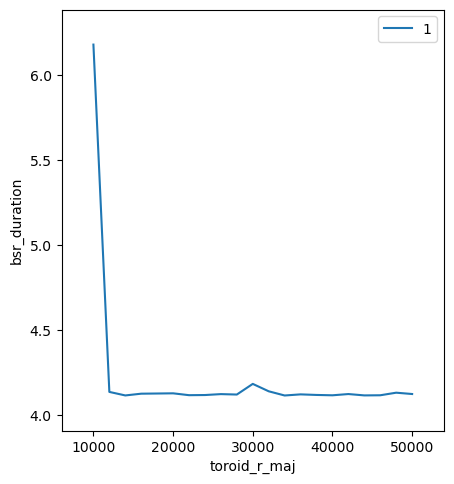

In [3]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import BeamStatisticsReport, create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("shadow", "00000002")

classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

bsr = BeamStatisticsReport(name="bsr", connection=connection)

toroid.r_maj.kind = "hinted"
bsr.duration.kind = "hinted"

scan_range = (10_000, 50_000, 21)

(uid,) = RE(bp.scan([bsr], toroid.r_maj, *scan_range))

hdr = db[uid]
tbl = hdr.table()
print(tbl)

/tmp/ipykernel_5885/1375322784.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 4))


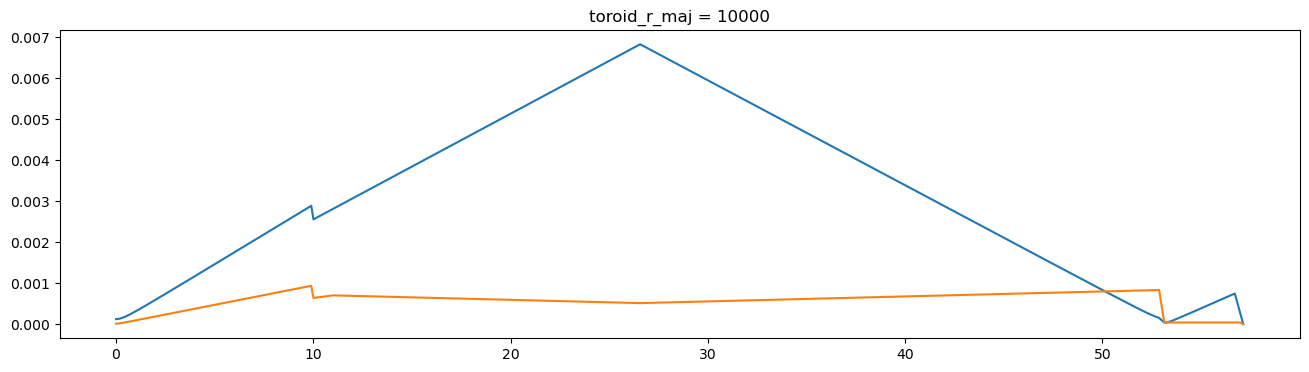

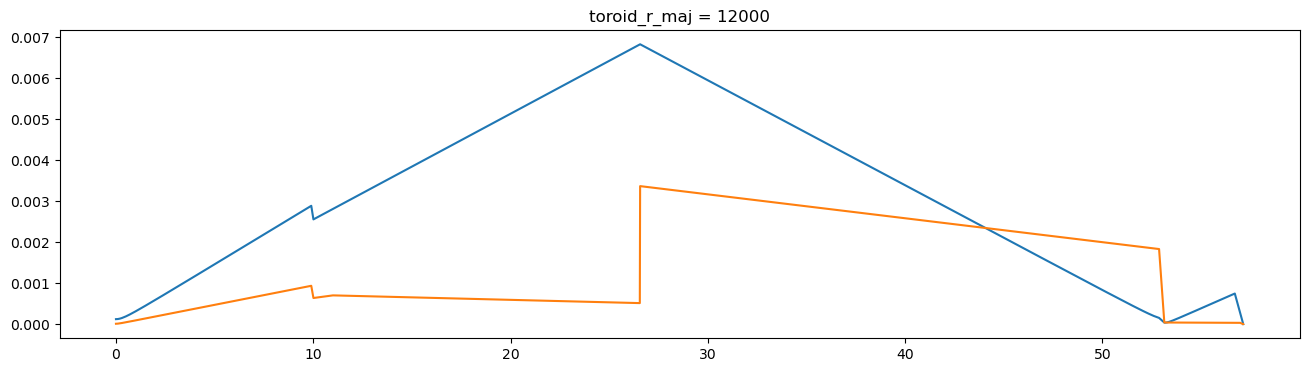

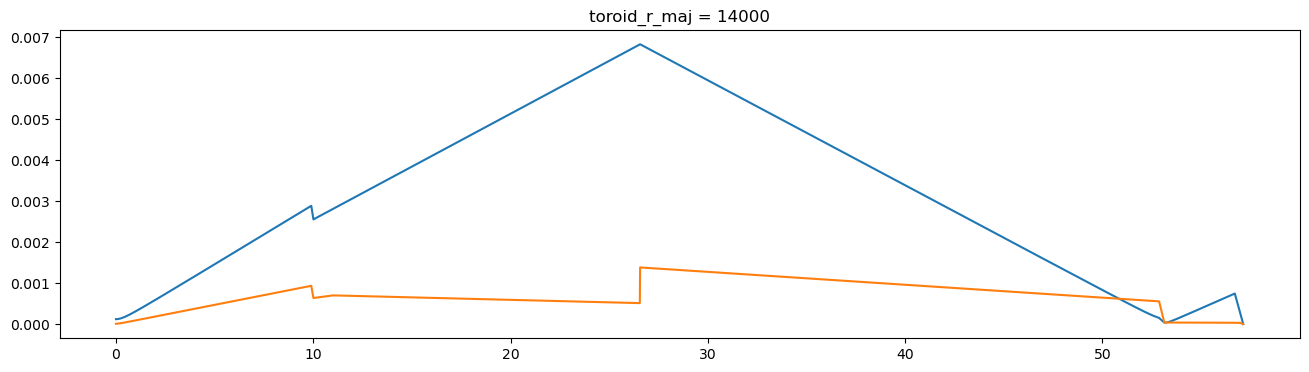

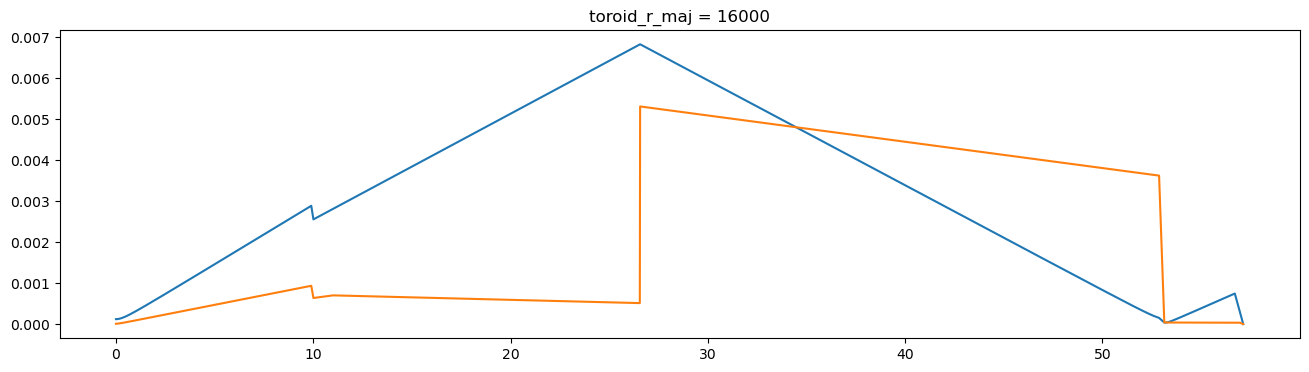

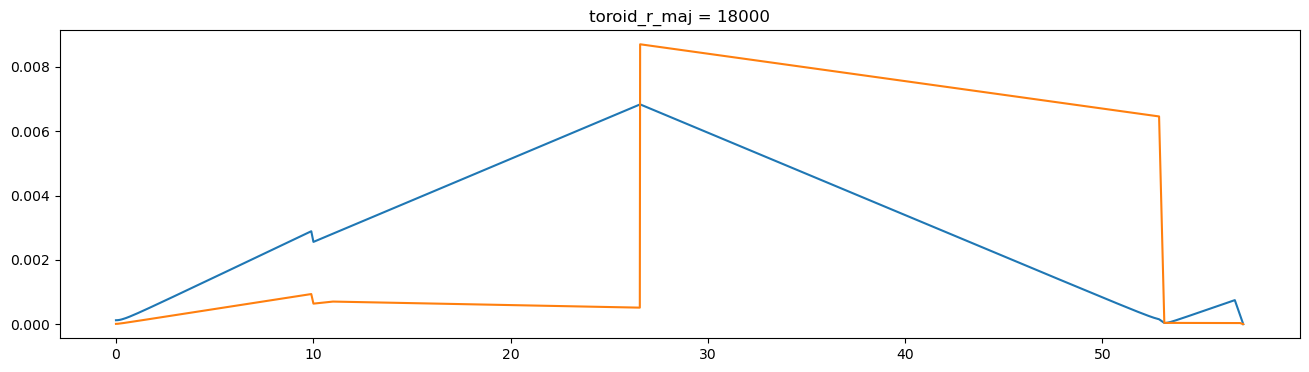

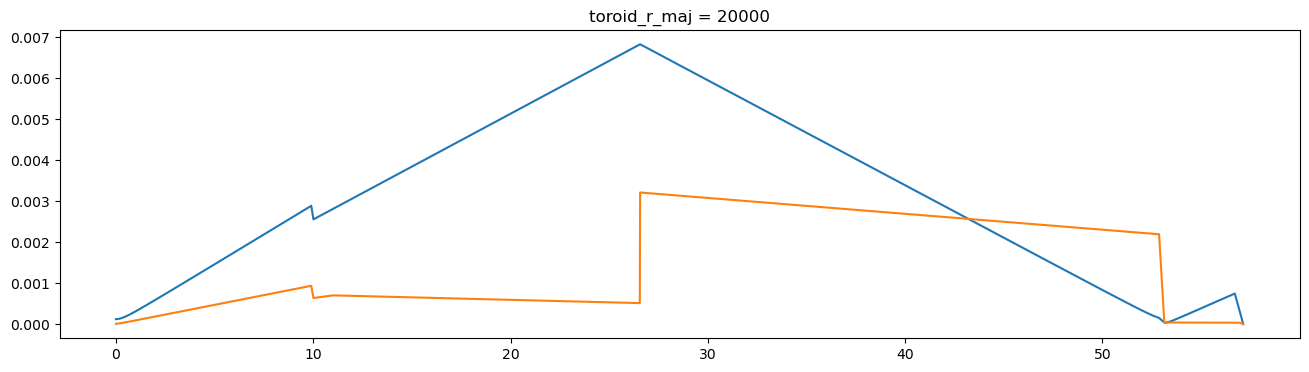

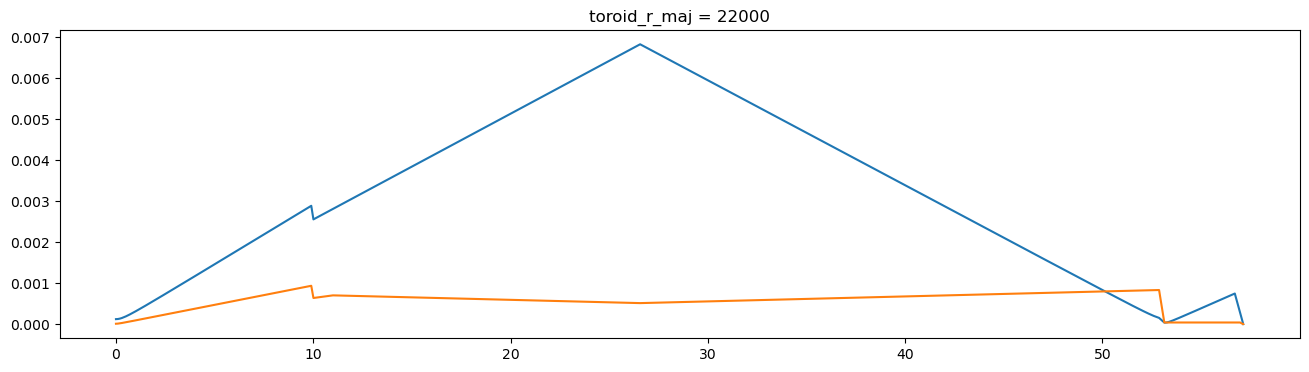

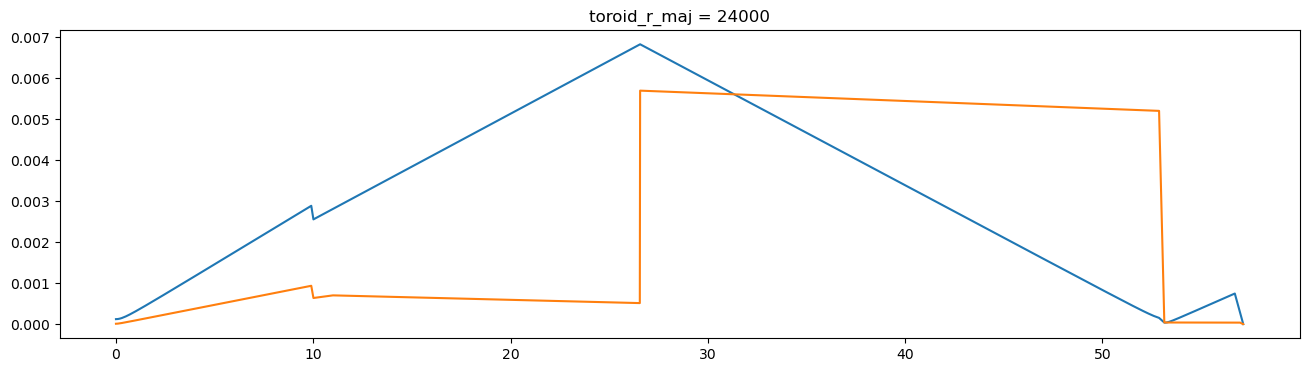

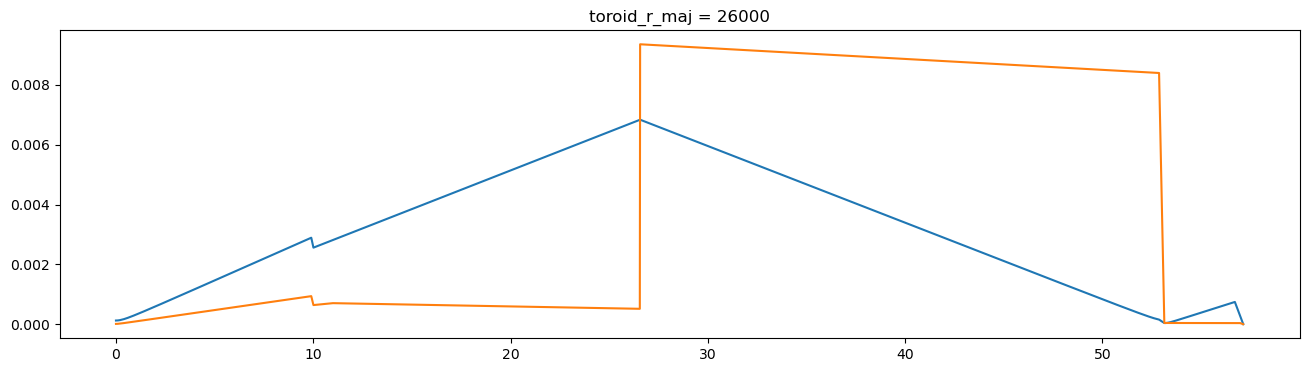

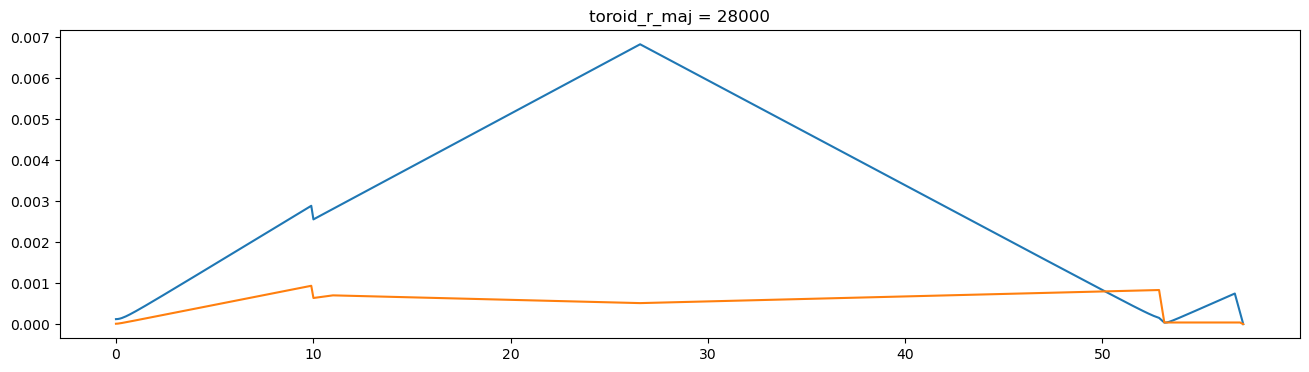

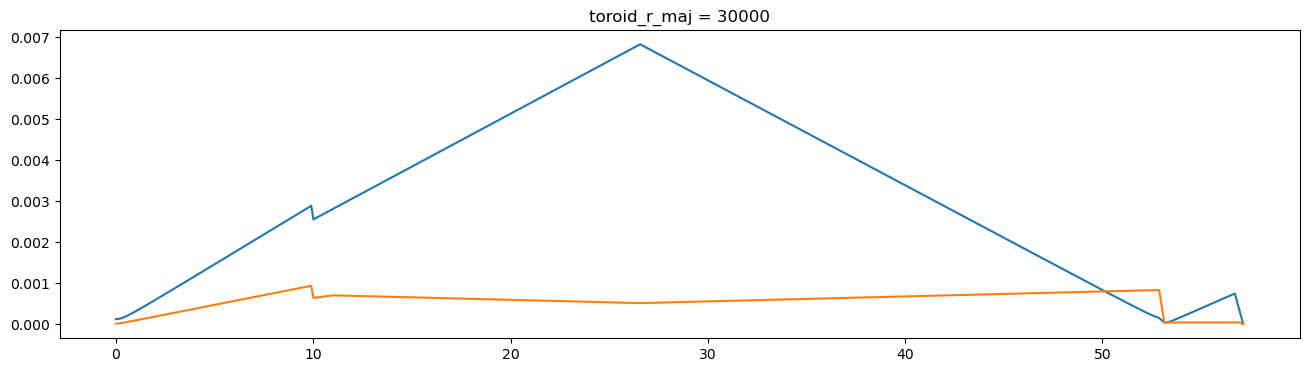

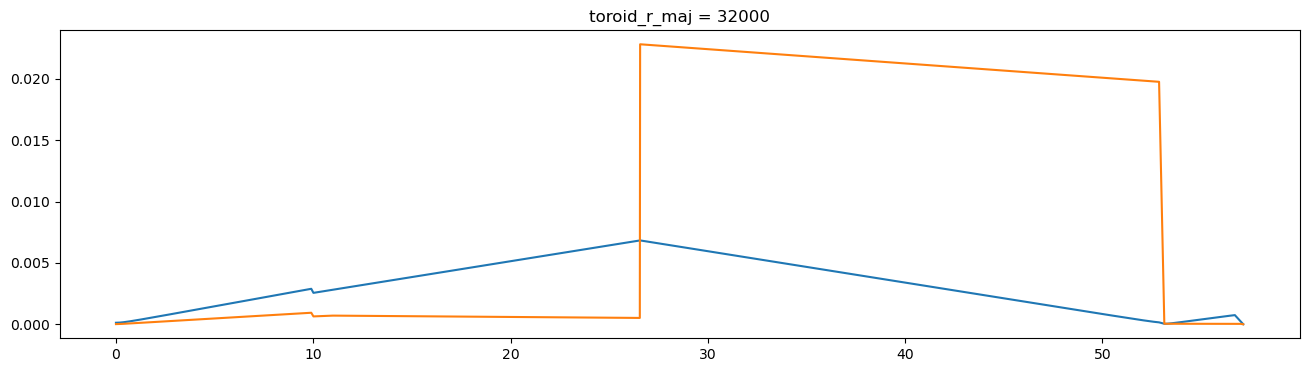

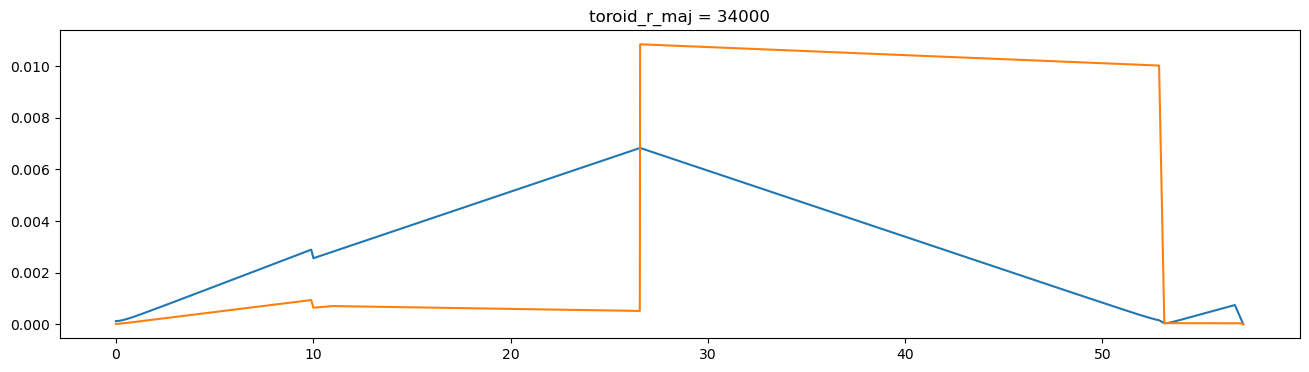

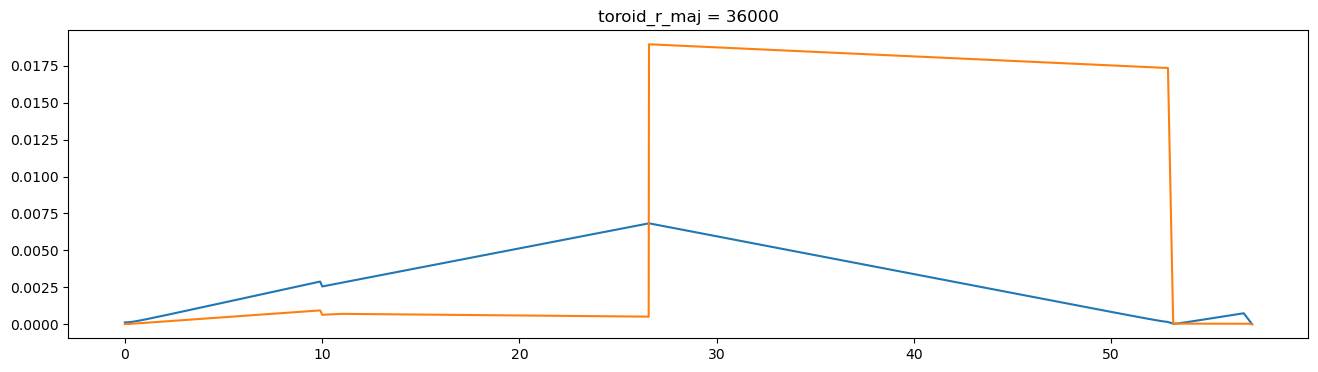

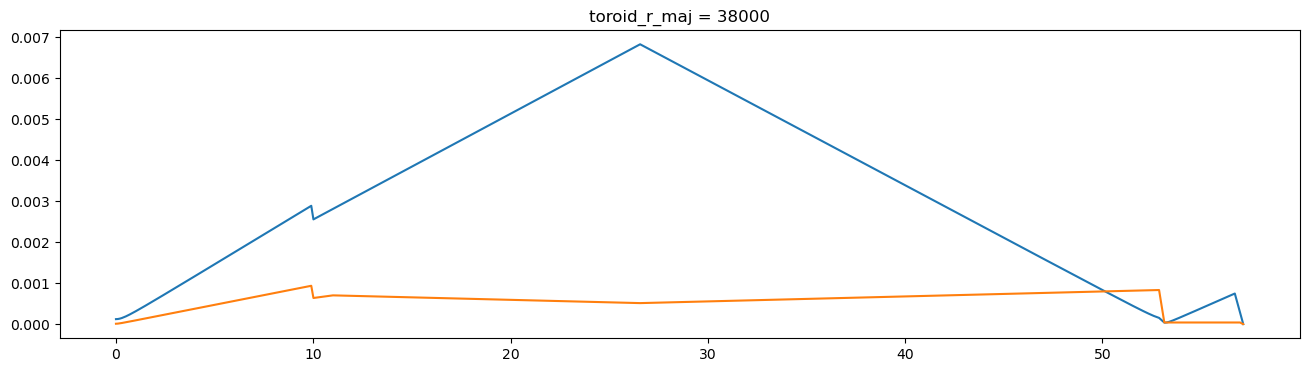

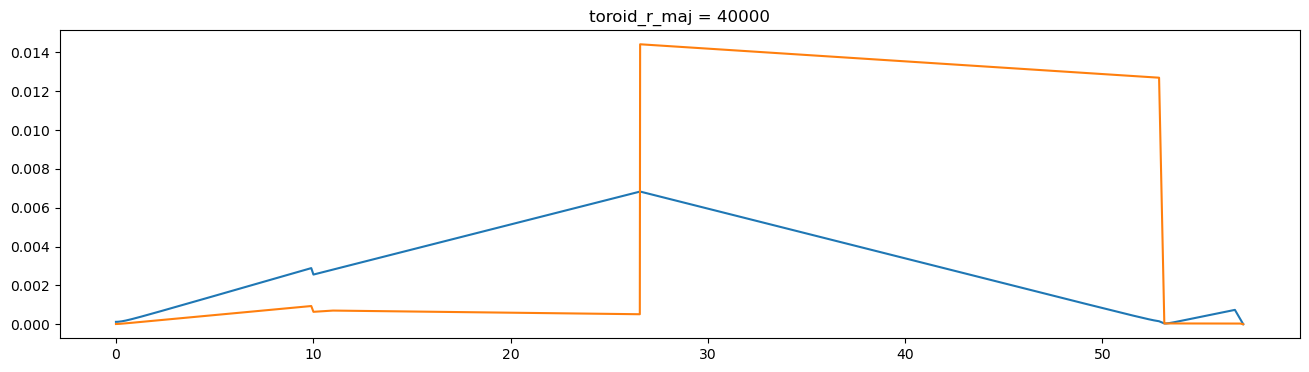

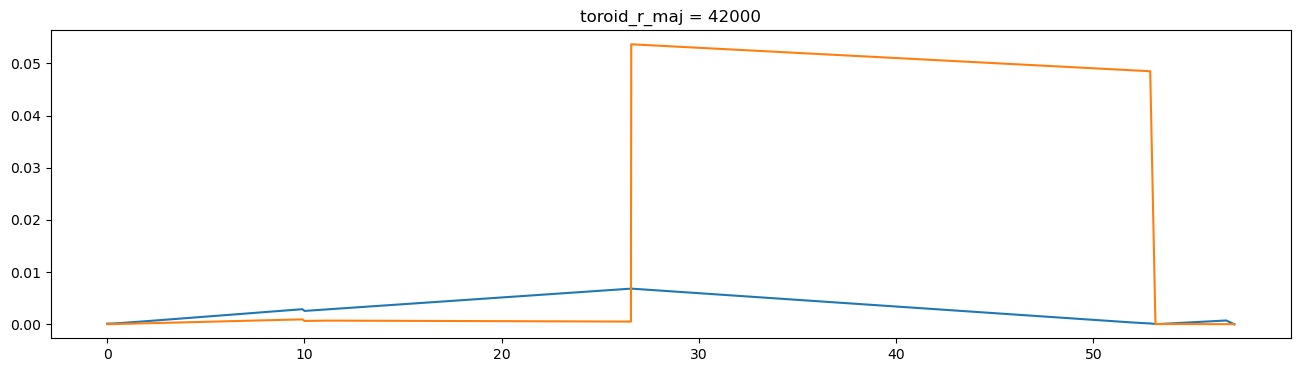

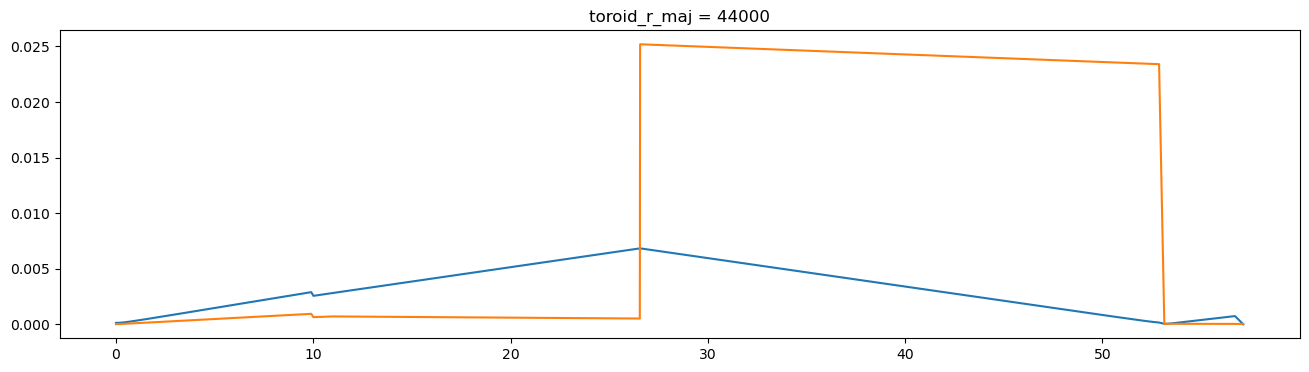

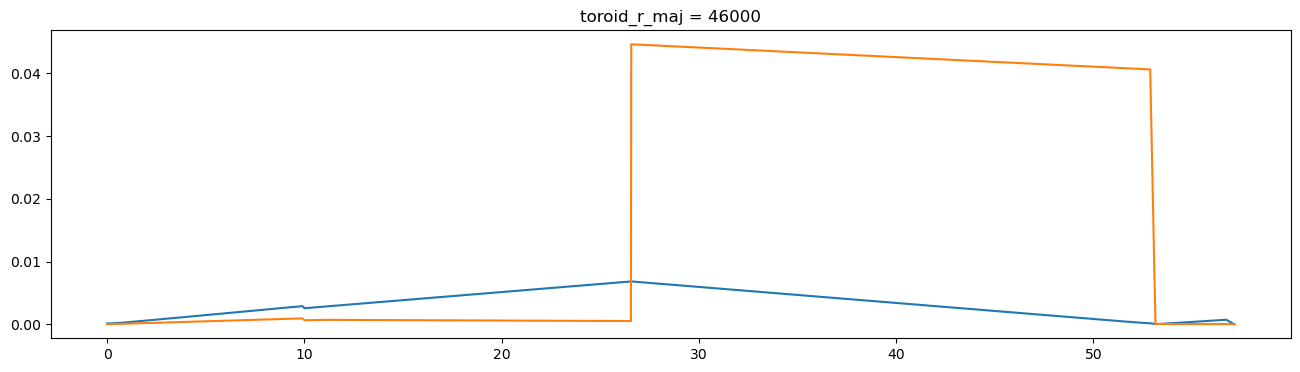

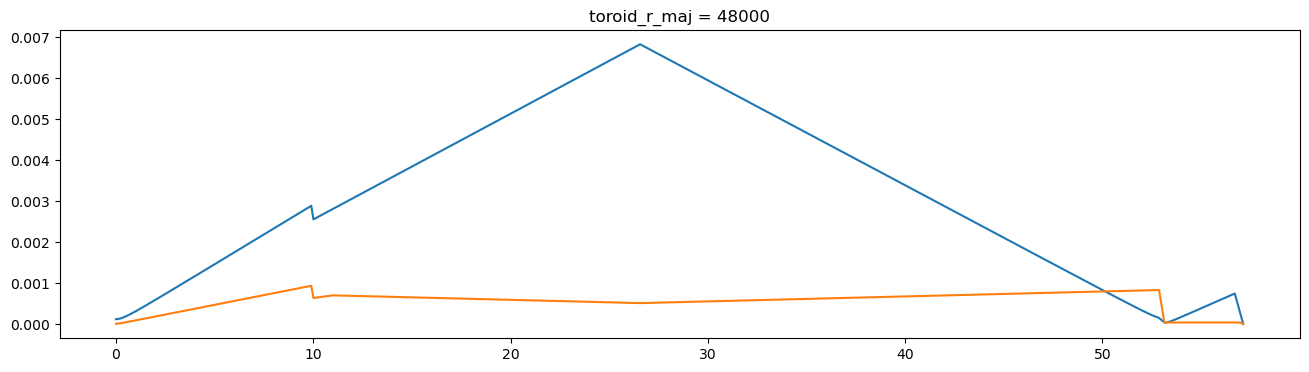

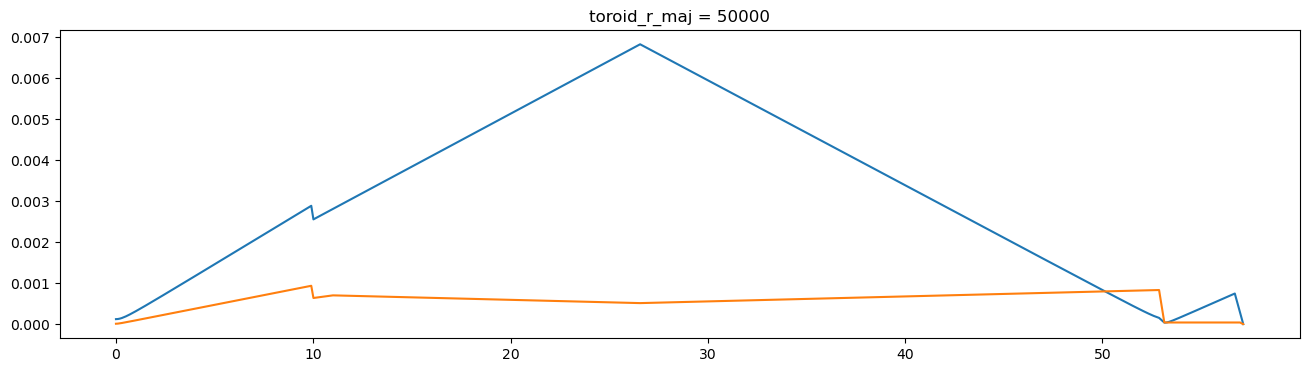

In [4]:
import json
import matplotlib.pyplot as plt

for idx in range(1, tbl["toroid_r_maj"].size + 1):
    d = json.loads(tbl["bsr_report"][idx])
    plt.figure(figsize=(16, 4))
    plt.plot(d["s"], d["sigmax"])
    plt.plot(d["s"], d["sigmaz"])
    plt.title(f"toroid_r_maj = {tbl['toroid_r_maj'][idx]:.0f}")

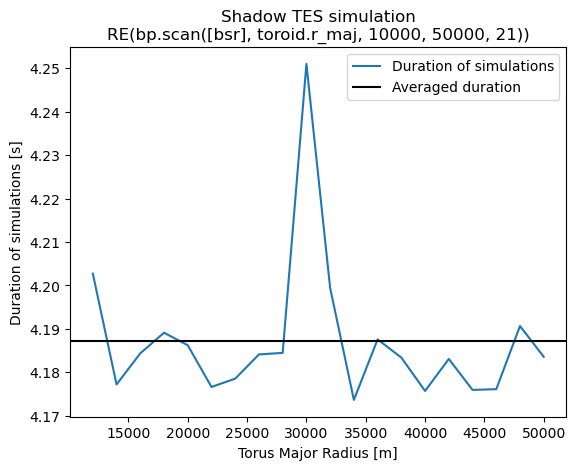

In [5]:
data = np.array(tbl["time"].diff(), dtype=float)[1:] / 1e9

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.linspace(*scan_range)[1:], data, label="Duration of simulations")
ax.set_ylabel("Duration of simulations [s]")
ax.set_xlabel("Torus Major Radius [m]")
ax.axhline(data.mean(), color="k", label="Averaged duration")
ax.legend()
title = (
    f"Shadow TES simulation\n"
    f"RE(bp.scan([bsr], toroid.r_maj, "
    f"{', '.join([str(x) for x in scan_range])}))"
)
ax.set_title(title)
plt.show()